# Requisito 3
Gerar um sub-grafo a partir da rede geral (2010 - 2025) contendo apenas os
vértices que possuem pelo menos X vizinhos.
* X será um valor a ser definido por metodologia criada por vocês.
* Calcular a densidade desse sub-grafo e comparar com o grafo geral.
* Visualizar a rede geral e o sub-grafo.
* Escolher um vértice e analisar sua rede ego.

In [ ]:
#Importe das bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

In [ ]:
#Dowload e Leitura do dataset
file_path = "/content/drive/MyDrive/AED2/projetos/projeto1/avaliacao_geral/2010-2025.gexf"
graph_geral = nx.read_gexf(file_path)

In [ ]:
#Calculo do número de vertices
num_nodes = graph_geral.number_of_nodes()

#Calculo do número de arestas
num_edges = graph_geral.number_of_edges()

#Cálculo da densidade
density = nx.density(graph_geral)

#Cálculo do numero médio de vizinhos
degree = [deg for node, deg in graph_geral.degree]
avg_degree = sum(degree) / len(degree)


#Impressão dos resultados
print("Número de vértices:", num_nodes)
print("Número de arestas:", num_edges)
print("Densidade:", density)
print("Número médio de vizinhos:", avg_degree)

Número de vértices: 2454
Número de arestas: 26113
Densidade: 0.008675902401164717
Número médio de vizinhos: 21.28198859005705


In [ ]:
#Metodologia para criar o sub-grafo será os vertices que tem 25 vizinhos

In [ ]:
#Separar em um sub-grafo a rede geral

# Encontre os nós com pelo menos 25 vizinhos
nodes_to_keep = [node for node, degree in dict(graph_geral.degree()).items() if degree >= 25]

# Crie o subgrafo
subgraph = graph_geral.subgraph(nodes_to_keep)

# Calcule a densidade do subgrafo
subgraph_density = nx.density(subgraph)

# Imprima os resultados
print("Número de vértices no subgrafo:", subgraph.number_of_nodes())
print("Número de arestas no subgrafo:", subgraph.number_of_edges())
print(f"Densidade do subgrafo: {subgraph_density:.3f}")
print(f"Densidade do grafo geral: {density:.3f}")



Número de vértices no subgrafo: 461
Número de arestas no subgrafo: 7769
Densidade do subgrafo: 0.07
Densidade do grafo geral: 0.01


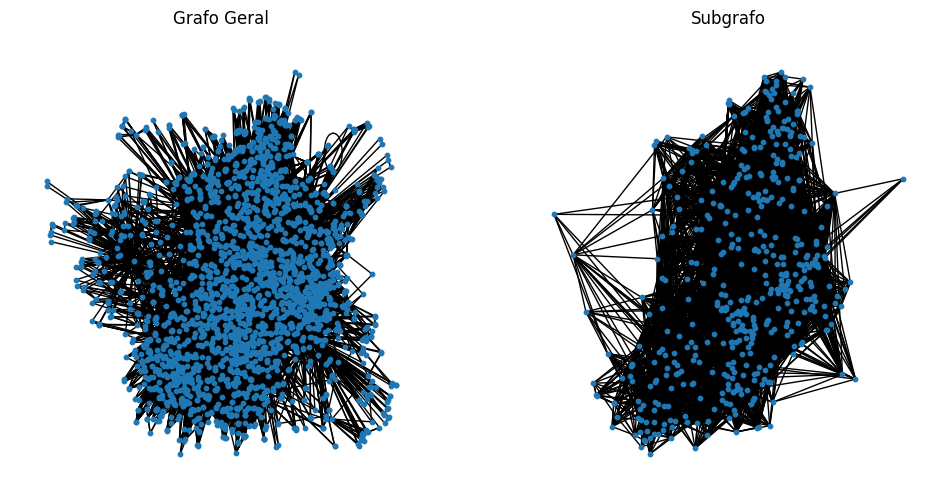

In [ ]:
# Visualização
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Grafo Geral")
pos = nx.spring_layout(graph_geral, seed=42) # Use seed for reproducibility
nx.draw(graph_geral, pos, node_size=10, with_labels=False)


plt.subplot(1, 2, 2)
plt.title("Subgrafo")
nx.draw(subgraph, pos, node_size=10, with_labels=False) # Use the same layout

plt.show()

Vizinhos do nó 55926512000: ['56649607000', '57214619572', '50661492500', '57205118256', '6603844872', '56363591700', '36537969500', '6603627735', '59455296600', '7005447974', '35519411300', '57192428732', '57211848574', '56027441300', '57208260908', '55191031900', '6603603627', '57216084309', '57202496125', '57202609106', '57202607438', '55565274700']


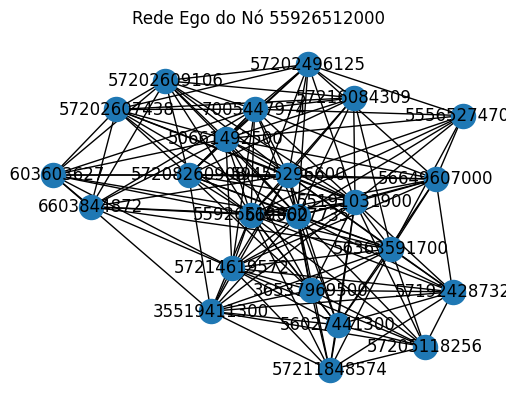

In [ ]:
# Análise de rede ego
ego_node = '55926512000' # Mude para um nó existente no subgrafo
if ego_node in subgraph.nodes():
    ego_graph = nx.ego_graph(subgraph, ego_node)
    print(f"Vizinhos do nó {ego_node}: {list(ego_graph.neighbors(ego_node))}")
    plt.figure()
    plt.title(f"Rede Ego do Nó {ego_node}")
    nx.draw(ego_graph, with_labels=True)
    plt.show()
else:
    print(f"Nó {ego_node} não encontrado no subgrafo.")

# Análise dos Resultados
* O que foi feito? Como foi feito? Principais achados? Dificuldades? Suas
hipóteses sobre os achados?

A análise do Requisito 3 consistiu em gerar um subgrafo a partir da rede geral (2010–2025), contendo apenas os vértices que possuem pelo menos X vizinhos, sendo o valor de X definido com base em uma metodologia adotada pela dupla, descrita a seguir.

Inicialmente, foi realizada a leitura do arquivo que contém os dados da rede geral utilizando a biblioteca NetworkX. Em seguida, foram calculadas algumas métricas relevantes, como o número de vértices, número de arestas, média de vizinhos por nó e a densidade da rede. Esses dados foram essenciais para compreender as características da rede geral e embasar a definição de um critério para a criação do subgrafo.

Considerando que a média de vizinhos por nó na rede geral é de aproximadamente 21, decidiu-se adotar X = 25 como critério mínimo de vizinhança para um nó ser incluído no subgrafo. Tal escolha foi feita com o objetivo de filtrar os nós mais conectados da rede, o que poderia revelar padrões de maior coautoria ou influência.

A partir desse critério, foram identificados na rede geral os nós que possuíam pelo menos 25 vizinhos, e com eles foi gerado o subgrafo utilizando funções da biblioteca NetworkX. Posteriormente, foi calculada a densidade da rede geral e do subgrafo, sendo os resultados, respectivamente, 0,01 e 0,07. Isso indica que o subgrafo apresenta uma estrutura significativamente mais densa, ou seja, com maior interconectividade entre os nós em comparação com a rede completa.

Outro ponto a ser avaliado foi a visualização do grafo geral e o sub-grafo. Do grafo geral observa-se uma estrutura complexa e densa, com muitos nós e arestas. Como também, sua conectividade é visivelmente distribuída, mas há regiões de maior aglomeração, sugerindo a existência de comunidades ou grupos com alta interação entre si. Já em relação ao subgrafo, notou-se uma rede mais compacta e organizada, onde os nós estão mais fortemente conectados. Isso é coerente com a densidade mais alta observada, evidenciando que os nós mais conectados tendem a formar uma subestrutura mais coesa e interligada.

Para a analise da rede ego, um vértice foi selecionado aleatoriamente a partir da subrede para a construção de sua rede ego. Com esse fim, Utilizou-se a função ego_graph() da biblioteca NetworkX, com o identificador do nó central escolhido (nó 55926512000, conforme mostrado na imagem), e posteriormente a rede foi visualizada com *matplotlib* . Os principais achados que pode-se citar são:
- O nó analisado possui uma quantidade significativa de conexões, o que reforça sua importância ou centralidade dentro da rede.

- A rede ego é bastante conectada internamente, sugerindo que os coautores desse nó também colaboram entre si.

E sobre as dificuldades, ficaram concentradas em definir o valor de X de forma justificada e metodológica. Também como a visualização de redes com muitos nós e conexões, pois gerou a sobreposição de informações e dificultou a interpretação visual.